In [1]:
# standard modules
import seaborn as sns
import pandas as pd
import numpy as np
import os
#import math

# Modules for Displaying Figures
import matplotlib.pyplot as plt
import scipy.stats as stats


# Data Science Modules 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# My modules
import src.acquire as ac
import src.prepare as pp
import src.helper as helper
import src.evaluate as evaluate

# Turn off the red warnings
import warnings
warnings.filterwarnings("ignore")

The following datasets are available:
telco


In [2]:
telco = ac.get_telco_data()

In [6]:
x_train, y_train, x_validate, y_validate, x_test, y_test = pp.model_telco_data(telco)

In [7]:
# running a function which determines which way to default our target variable
# We are using the 'churn' variable as target because we are attempting to predict
print(f"Baseline accuracy is {round(evaluate.baseline(telco, 'churn')*100,2)}%")

Baseline accuracy is 73.46%


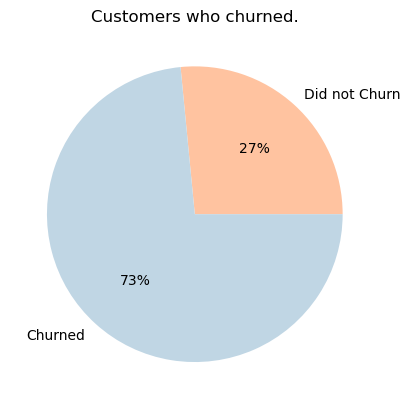

In [3]:
evaluate.make_pie(telco, 'churn')

In [9]:
def baseline_bar(df, var):
    " get graph of game rating for upsets and non-upsets"

    # assign values and labels
    values = [len(df[var][df[var] == 'Yes']).mean(), len(df[var][df[var] == 'No']).mean()]
    #values = [train.game_rating[(train.upset == True)].mean(),train.game_rating[(train.upset == False)].mean()]
    labels = ['Did not Churn','Churned']

    # generate and display graph
    plt.bar(height=values, x=labels, color=['#ffc3a0', '#c0d6e4'])
    plt.title('The Mean Game Rating is About the Same in Upsets and Non-upsets')
    plt.tight_layout()
    plt.show()

In [10]:
make_bar(telco, 'churn')

AttributeError: 'int' object has no attribute 'mean'

## Running KNN with N = 5 (default setting)

In [4]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, baseline_train)
y_predictions = knn.predict(x_train)

In [5]:
y_predictions = knn.predict(x_train)

In [6]:
y_predictions

array([0, 1, 0, ..., 0, 0, 1])

In [7]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [8]:
confusion_matrix(y_train, y_predictions)

array([[2627,  264],
       [ 376,  670]])

In [9]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2891
           1       0.72      0.64      0.68      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.77      0.78      3937
weighted avg       0.83      0.84      0.83      3937



In [10]:
evaluate.print_classification_metrics(y_train, y_predictions)

Accuracy: 83.74
True Positive Rate: 64.05
False Positive Rate: 9.13
True Negative Rate: 90.87
False Negative Rate: 35.95
Precision: 71.73
Recall: 64.05
F1 Score: 67.68
Support (0): 104600
Support (1): 289100


## Running the KNN model with N = 10

In [11]:
knn = KNeighborsClassifier(n_neighbors=10)

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# creating baseline based on 
y_preds = knn.predict(baseline_train)

In [13]:
y_preds = knn.predict(x_train)

In [14]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [15]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      2891
           1       0.74      0.52      0.61      1046

    accuracy                           0.82      3937
   macro avg       0.79      0.73      0.75      3937
weighted avg       0.82      0.82      0.81      3937



In [16]:
evaluate.print_classification_metrics(y_train, y_preds)

Accuracy: 82.35
True Positive Rate: 51.91
False Positive Rate: 6.64
True Negative Rate: 93.36
False Negative Rate: 48.09
Precision: 73.88
Recall: 51.91
F1 Score: 60.98
Support (0): 104600
Support (1): 289100


## Evaluating differences in KNN model performance

In [79]:
train_predict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}


for n in [5, 10]:
    '''
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # building baseline predictions 
    knn.fit(x_train, y_train)
    y_predictions = knn.predict(baseline_train)
    train_predict['model'].append(f'baseline_{n}')
    train_predict['accuracy'].append(accuracy)
    train_predict['true_positive_rate'].append(true_positive_rate)
    train_predict['false_positive_rate'].append(false_positive_rate)
    train_predict['true_negative_rate'].append(true_negative_rate)
    train_predict['false_negative_rate'].append(false_negative_rate)
    train_predict['precision'].append(precision)
    train_predict['recall'].append(recall)
    train_predict['f1_score'].append(f1_score)
    train_predict['support_0'].append(support_pos)
    train_predict['support_1'].append(support_neg)
    '''

    # building knn model predictions
    knn.fit(x_train, y_train)
    y_preds = knn.predict(x_train)

    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN

    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN

    train_predict['model'].append(f'knn_n_{n}')
    train_predict['accuracy'].append(accuracy)
    train_predict['true_positive_rate'].append(true_positive_rate)
    train_predict['false_positive_rate'].append(false_positive_rate)
    train_predict['true_negative_rate'].append(true_negative_rate)
    train_predict['false_negative_rate'].append(false_negative_rate)
    train_predict['precision'].append(precision)
    train_predict['recall'].append(recall)
    train_predict['f1_score'].append(f1_score)
    train_predict['support_0'].append(support_pos)
    train_predict['support_1'].append(support_neg)
    
train_predict = pd.DataFrame(train_predict).T

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
train_predict

,0,1,2,3
model,baseline_10,knn_n_5,baseline_10,knn_n_10
accuracy,0.82347,0.83744,0.83744,0.82347
true_positive_rate,0.51912,0.640535,0.640535,0.51912
false_positive_rate,0.066413,0.091318,0.091318,0.066413
true_negative_rate,0.933587,0.908682,0.908682,0.933587
false_negative_rate,0.48088,0.359465,0.359465,0.48088
precision,0.738776,0.717345,0.717345,0.738776
recall,0.51912,0.640535,0.640535,0.51912
f1_score,0.60977,0.676768,0.676768,0.60977
support_0,1046,1046,1046,1046


## Evaluating Models on validation data set

In [21]:
validate_predict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}

for n in [5, 10]:
    knn = KNeighborsClassifier(n_neighbors=n)
    
    knn.fit(x_train, y_train)
    
    y_preds = knn.predict(x_validate)
    
    TN, FP, FN, TP = confusion_matrix(y_validate, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    validate_predict['model'].append(f'knn_n_{n}')
    validate_predict['accuracy'].append(accuracy)
    validate_predict['true_positive_rate'].append(true_positive_rate)
    validate_predict['false_positive_rate'].append(false_positive_rate)
    validate_predict['true_negative_rate'].append(true_negative_rate)
    validate_predict['false_negative_rate'].append(false_negative_rate)
    validate_predict['precision'].append(precision)
    validate_predict['recall'].append(recall)
    validate_predict['f1_score'].append(f1_score)
    validate_predict['support_0'].append(support_pos)
    validate_predict['support_1'].append(support_neg)
    
validate_predict = pd.DataFrame(validate_predict).T

In [23]:
validate_predict

,0,1
model,knn_n_5,knn_n_10
accuracy,0.771919,0.781991
true_positive_rate,0.52784,0.423163
false_positive_rate,0.139629,0.087974
true_negative_rate,0.860371,0.912026
false_negative_rate,0.47216,0.576837
precision,0.578049,0.635452
recall,0.52784,0.423163
f1_score,0.551804,0.508021
support_0,449,449


In [30]:
compare = pd.concat([train_predict, validate_predict], axis = 1)

In [31]:
compare

,0,1,0,1
model,knn_n_5,knn_n_10,knn_n_5,knn_n_10
accuracy,0.83744,0.82347,0.771919,0.781991
true_positive_rate,0.640535,0.51912,0.52784,0.423163
false_positive_rate,0.091318,0.066413,0.139629,0.087974
true_negative_rate,0.908682,0.933587,0.860371,0.912026
false_negative_rate,0.359465,0.48088,0.47216,0.576837
precision,0.717345,0.738776,0.578049,0.635452
recall,0.640535,0.51912,0.52784,0.423163
f1_score,0.676768,0.60977,0.551804,0.508021
support_0,1046,1046,449,449


- Looks like the N = 10 KNN model works better on the validate data than n = 5 model
- I think I am locking down this model on N = 10. 

## Testing the N = 10 KNN model

In [33]:
test_predict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}
n = 10

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(x_train, y_train)

y_preds = knn.predict(x_test)

TN, FP, FN, TP = confusion_matrix(y_test, y_preds).ravel()
ALL = TP + TN + FP + FN

accuracy = (TP + TN)/ALL
true_positive_rate = TP/(TP+FN)
false_positive_rate = FP/(FP+TN)
true_negative_rate = TN/(TN+FP)
false_negative_rate = FN/(FN+TP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

test_predict['model'].append(f'knn_n_{n}')
test_predict['accuracy'].append(accuracy)
test_predict['true_positive_rate'].append(true_positive_rate)
test_predict['false_positive_rate'].append(false_positive_rate)
test_predict['true_negative_rate'].append(true_negative_rate)
test_predict['false_negative_rate'].append(false_negative_rate)
test_predict['precision'].append(precision)
test_predict['recall'].append(recall)
test_predict['f1_score'].append(f1_score)
test_predict['support_0'].append(support_pos)
test_predict['support_1'].append(support_neg)

test_predict = pd.DataFrame(test_predict).T

In [89]:
test_predict

,0
model,knn_n_10
accuracy,0.785359
true_positive_rate,0.451872
false_positive_rate,0.093901
true_negative_rate,0.906099
false_negative_rate,0.548128
precision,0.635338
recall,0.451872
f1_score,0.528125
support_0,374


In [102]:
test_predict.T['accuracy']

0    0.785359
Name: accuracy, dtype: object

In [104]:
print(f"{baseline_accuracy} {test_predict.T['accuracy']}")

No     0.73463
Yes    0.26537
Name: churn, dtype: float64 0    0.785359
Name: accuracy, dtype: object


In [115]:
{round(test_predict.T['accuracy'][0]*100,2)}%

0.7853589196872779

In [122]:
print(f"Baseline accuracy = {round(baseline_accuracy[0]*100,2)}%") 
print(f"KNN model Accuracy = {round(test_predict.T['accuracy'][0]*100,2)}%")

Baseline accuracy = 73.46%
KNN model Accuracy = 78.54%
